In [69]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, plot_roc_curve, roc_auc_score, recall_score,
    precision_score, f1_score, classification_report, RocCurveDisplay)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.experimental import Adagrad
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Modeling

In [8]:
data = pd.read_csv('data/merged_clean.csv')

In [9]:
data

,state,county,year,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM10 Total 0-10um STP,PM2.5 - Local Conditions,births_low,avg_weight_low,avg_ges_age_low,births_all,avg_weight_all,avg_ges_age_all,pct_low,high_rate
0,Alabama,Jefferson,2014,0.578752,28.600838,0.048302,24.918033,11.698347,687.0,1940.866,34.068,7376.0,3216.859,38.508,0.093,1
1,Alabama,Jefferson,2015,0.526681,22.163818,0.047164,23.883333,11.772881,681.0,1903.761,33.633,7032.0,3210.182,38.434,0.097,1
2,Alabama,Jefferson,2016,0.444555,28.544643,0.051325,24.256809,10.781667,709.0,1947.176,34.059,7061.0,3188.066,38.456,0.100,1
3,Alabama,Jefferson,2017,0.367024,20.712610,0.045971,22.300057,10.325455,662.0,1929.279,34.045,6767.0,3202.834,38.456,0.098,1
4,Alabama,Jefferson,2018,0.344179,23.718644,0.049131,22.985533,10.329508,570.0,1959.763,34.040,6560.0,3222.885,38.468,0.087,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Virginia,Henrico,2012,0.280747,20.574425,0.051786,13.637931,8.813274,214.0,1969.061,34.028,3172.0,3284.726,38.515,0.067,0
829,Virginia,Henrico,2013,0.275766,18.603944,0.045632,12.949153,8.213600,220.0,1911.200,34.077,3030.0,3292.195,38.539,0.073,0
830,Virginia,Henrico,2015,0.251937,17.331956,0.048887,13.385965,8.017213,199.0,1947.628,33.844,3144.0,3291.971,38.609,0.063,0
831,Virginia,Henrico,2016,0.238917,6.882078,0.048024,12.850000,7.190476,225.0,1913.236,33.545,3137.0,3282.525,38.583,0.072,0


#### Define X, y and train/test split

In [14]:
data.columns

Index(['state', 'county', 'year', 'Carbon monoxide', 'Nitrogen dioxide (NO2)',
       'Ozone', 'PM10 Total 0-10um STP', 'PM2.5 - Local Conditions',
       'births_low', 'avg_weight_low', 'avg_ges_age_low', 'births_all',
       'avg_weight_all', 'avg_ges_age_all', 'pct_low', 'high_rate'],
      dtype='object')

In [15]:
X = data[['Carbon monoxide', 'Nitrogen dioxide (NO2)','Ozone','PM10 Total 0-10um STP','PM2.5 - Local Conditions']]
y = data['high_rate']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    stratify=y,
                                                    random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((666, 5), (167, 5), (666,), (167,))

In [55]:
train_baseline = pd.DataFrame(y_train).value_counts(normalize=True).iloc[0]
test_baseline = pd.DataFrame(y_test).value_counts(normalize=True).iloc[0]
train_baseline, test_baseline

(0.8963963963963963, 0.8982035928143712)

#### Scale the data

In [19]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#### Build the model

In [68]:
model = Sequential()
model.add(Dense(600, input_dim=X_train_ss.shape[1], activation='elu'))
model.add(Dense(300, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adagrad(learning_rate=1.), 
              loss='bce', 
              metrics=['accuracy'])

history = model.fit(X_train_ss, y_train,
                    batch_size=8, epochs=100,
                    callbacks=EarlyStopping(patience=5),
                    validation_data=(X_test_ss, y_test))

Epoch 1/100
84/84 [==============================] - 5s 26ms/step - loss: 19339666.0000 - accuracy: 0.7523 - val_loss: 6.8211 - val_accuracy: 0.6467
Epoch 2/100
84/84 [==============================] - 2s 25ms/step - loss: 2423.2363 - accuracy: 0.5075 - val_loss: 1.0551 - val_accuracy: 0.4371
Epoch 3/100
84/84 [==============================] - 4s 47ms/step - loss: 0.6459 - accuracy: 0.8378 - val_loss: 1.1041 - val_accuracy: 0.8982
Epoch 4/100
84/84 [==============================] - 3s 39ms/step - loss: 0.5760 - accuracy: 0.8964 - val_loss: 0.4470 - val_accuracy: 0.8982
Epoch 5/100
84/84 [==============================] - 4s 50ms/step - loss: 0.3964 - accuracy: 0.8964 - val_loss: 0.3545 - val_accuracy: 0.8982
Epoch 6/100
84/84 [==============================] - 3s 39ms/step - loss: 0.3723 - accuracy: 0.8949 - val_loss: 0.3923 - val_accuracy: 0.8982
Epoch 7/100
84/84 [==============================] - 3s 37ms/step - loss: 0.3712 - accuracy: 0.8964 - val_loss: 0.3568 - val_accuracy: 0.8

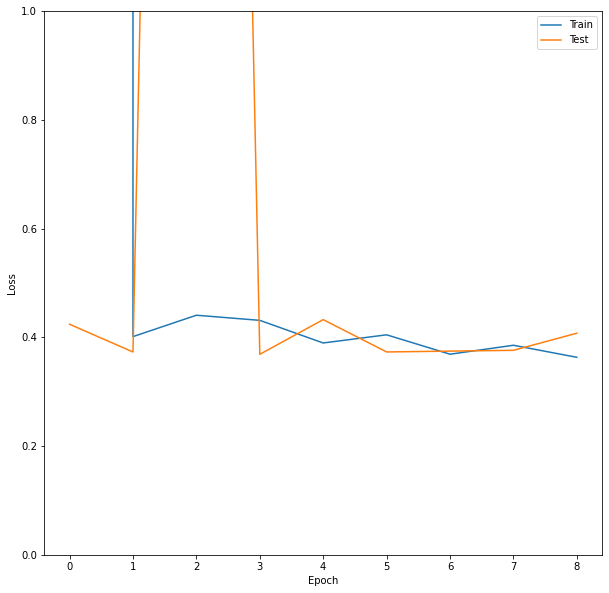

In [67]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend();

In [98]:
y_pred = model.predict(X_test_ss)
y_pred = pd.Series(y_pred.reshape(-1))
y_pred = preds.map(lambda x: 1 if x>.1 else 0)

6/6 [==============================] - 0s 5ms/step


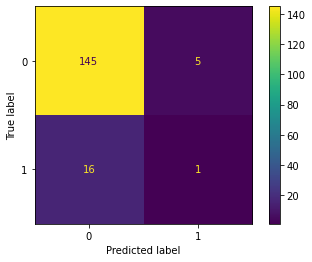

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import requests
from urllib.parse import urlencode
from yarl import URL
from time import sleep

In [3]:
lbw = pd.read_csv('data/Natality_by_year_2007-2021.txt', sep="\t")
lbw.columns = [col.lower().replace(' ', '_') for col in lbw.columns]

In [4]:
lbw.drop(columns='notes').dropna().sort_values(by='year', ascending=False)

,state,state_code,county,county_code,infant_birth_weight_12,infant_birth_weight_12_code,year,year_code,births,%_of_total_births,average_birth_weight,average_lmp_gestational_age,average_oe_gestational_age
21213,Wyoming,56.0,"Unidentified Counties, WY",56999.0,2000 - 2499 grams,5.0,2021.0,2021.0,230.0,0.01%,2303.27,36.19,36.30
11144,Missouri,29.0,"St. Charles County, MO",29183.0,2000 - 2499 grams,5.0,2021.0,2021.0,94.0,0.00%,2324.00,36.36,35.80
11120,Missouri,29.0,"St. Charles County, MO",29183.0,1000 - 1499 grams,3.0,2021.0,2021.0,20.0,0.00%,1277.05,30.30,30.05
1955,California,6.0,"San Diego County, CA",6073.0,1000 - 1499 grams,3.0,2021.0,2021.0,143.0,0.01%,1277.10,30.43,30.19
11108,Missouri,29.0,"St. Charles County, MO",29183.0,500 - 999 grams,2.0,2021.0,2021.0,10.0,0.00%,753.10,30.00,25.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,Iowa,19.0,"Unidentified Counties, IA",19999.0,500 - 999 grams,2.0,2007.0,2007.0,48.0,0.00%,785.85,26.13,25.72
15709,Ohio,39.0,"Warren County, OH",39165.0,1500 - 1999 grams,4.0,2007.0,2007.0,19.0,0.00%,1774.05,33.26,32.89
19108,Texas,48.0,"Travis County, TX",48453.0,500 - 999 grams,2.0,2007.0,2007.0,71.0,0.00%,759.96,25.44,25.31
15704,Ohio,39.0,"Warren County, OH",39165.0,1000 - 1499 grams,3.0,2007.0,2007.0,15.0,0.00%,1188.47,31.20,29.80


In [ ]:
data_path = Path('data/')
aqi_files = [file for file in data_path.glob('*aqi*') if file.is_file()]
aqi_files.sort()
aqi = pd.read_csv(aqi_files[0])
for file in aqi_files[1:]:
    aqi = pd.concat([aqi, pd.read_csv(file)])
aqi.columns = [col.lower().replace(' ', '_') for col in aqi.columns]
aqi.to_csv('data/aqi_by_year_2006-2021.csv', index=False)

In [ ]:
aqi.sort_values(by='days_with_aqi').sample(50)

In [ ]:
aqi['year'].value_counts()

## Getting data from the AQS API

In [3]:
email = f'winston.degraw@gmail.com'
key = 'carmelswift48'

In [4]:
def get_state_codes(email, key):
    '''
    Queries AQS to get the list of state codes
    '''
    base_url = 'https://aqs.epa.gov/data/api/list/states'
    params = {
        'email' : email,
        'key'   : key  
    }
    
    url = URL('?'.join([base_url, urlencode(params)]), encoded=False)
    res = requests.get(url)

    if res.status_code == 200:
        posts = pd.DataFrame(res.json()['Data'])
        return posts
    else:
        print(f'status: {res.status_code}')
    return None

#### Only need to query the state list once, so storing it to a variable to loop over.

In [5]:
state_codes = get_state_codes(email,key)
state_codes

,code,value_represented
0,01,Alabama
1,02,Alaska
2,04,Arizona
3,05,Arkansas
4,06,California
5,08,Colorado
6,09,Connecticut
7,10,Delaware
8,11,District Of Columbia
9,12,Florida


In [6]:
def get_county_codes(email, key, state):
    '''
    Queries AQS to get the list of county codes for the given state
    '''
    base_url = 'https://aqs.epa.gov/data/api/list/countiesByState'
    params = {
        'email' : email,
        'key'   : key  ,
        'state' : state
    }
    
    url = URL('?'.join([base_url, urlencode(params)]), encoded=False)
    res = requests.get(url)

    if res.status_code == 200:
        posts = pd.DataFrame(res.json()['Data'])
        return posts['code']
    else:
        print(f'status: {res.status_code}')
    return None

In [7]:
def get_param_class_codes(email, key):
    '''
    Queries AQS to get the codes representing the classes of measured air pollutants
    '''
    base_url = 'https://aqs.epa.gov/data/api/list/classes'
    params = {
        'email' : email,
        'key'   : key  
    }
    
    url = URL('?'.join([base_url, urlencode(params)]), encoded=False)
    res = requests.get(url)

    if res.status_code == 200:
        posts = pd.DataFrame(res.json()['Data'])
        return posts
    else:
        print(f'status: {res.status_code}')
    return None

In [8]:
get_param_class_codes(email,key)

,code,value_represented
0,AIRNOW MAPS,The parameters represented on AirNow maps (881...
1,ALL,Select all Parameters Available
2,AQI POLLUTANTS,Pollutants that have an AQI Defined
3,CORE_HAPS,Urban Air Toxic Pollutants
4,CRITERIA,Criteria Pollutants
5,CSN DART,List of CSN speciation parameters to populate ...
6,FORECAST,Parameters routinely extracted by AirNow (STI)
7,HAPS,Hazardous Air Pollutants
8,IMPROVE CARBON,IMPROVE Carbon Parameters
9,IMPROVE_SPECIATION,PM2.5 Speciated Parameters Measured at IMPROVE...


#### The `CRITERIA` class seems to be the suggested parameter class, so going to use that (`AQI POLLUTANTS` contains basically the same info, but with some aggregate stats as well that we don't want)

In [9]:
def get_param_codes_by_class(email, key, pc):
    '''
    Queries AQS to get the codes representing the parameters in parameter class (pc)
    '''
    base_url = 'https://aqs.epa.gov/data/api/list/parametersByClass'
    params = {
        'email' : email,
        'key'   : key  ,
        'pc'    : pc
    }
    
    url = URL('?'.join([base_url, urlencode(params)]), encoded=True)
    res = requests.get(url)

    if res.status_code == 200:
        posts = pd.DataFrame(res.json()['Data'])
        return posts['code']
    else:
        print(f'status: {res.status_code}')
    return None

#### Also only need to get this once, so storing it to a variable

In [10]:
param_codes = get_param_codes_by_class(email, key, 'CRITERIA').astype(str)
params_1 = ','.join(param_codes[:4].values)
params_2 = ','.join(param_codes[4:].values)
params = [params_1, params_2]

In [11]:
def aqs_api_annual_county(email, key, param, bdate, edate, state, county):
    '''
    Query the AQS API to get the annual summary data for the given parameter, state, county
    bdate and edate have to be in the same year for the request to work
    '''
    base_url = 'https://aqs.epa.gov/data/api/annualData/byCounty'
    params = {
        'email' : email,
        'key'   : key  ,
        'param' : param,
        'bdate' : bdate,
        'edate' : edate,
        'state' : state,
        'county': county
    }
    
    url = URL('?'.join([base_url, urlencode(params)]), encoded=False)
    res = requests.get(url)
    
    if res.status_code == 200:
        posts = pd.DataFrame(res.json()['Data'])
        return posts
    else:
        print(f'status: {res.status_code}')
        print(res.json())
    return None

### Now going to try to loop over all states, for each state loop over each year, for each year loop over each parameter, and for each parameter loop over each county in the state to gather the data for that county. Will have to query AQS for each state to get the county codes.

In [12]:
# put in beginning year, end year + 1
years = np.arange(2006, 2007).astype(str)
years

array(['2006'], dtype='<U21')

In [14]:
state_codes

,code,value_represented
0,01,Alabama
1,02,Alaska
2,04,Arizona
3,05,Arkansas
4,06,California
5,08,Colorado
6,09,Connecticut
7,10,Delaware
8,11,District Of Columbia
9,12,Florida


In [20]:
state_codes.iloc[state_codes[state_codes['value_represented']=='California'].index[0]:]

,code,value_represented
4,06,California
5,08,Colorado
6,09,Connecticut
7,10,Delaware
8,11,District Of Columbia
9,12,Florida
10,13,Georgia
11,15,Hawaii
12,16,Idaho
13,17,Illinois


In [96]:
data_list = []
for state_code, state in state_codes.values[:1]:
# Query for county codes at the top to avoid repeated queries
    county_codes = get_county_codes(email,key,state_code)
    for year in years:
        print('--------------------')
        print(f'Collecting data for state {state} in year {year}')
        print('--------------------')
        for county in county_codes:
            for param in params:
                data_list.append( aqs_api_annual_county(email, key, param, year+'0101', year+'1231', state_code, county) )

--------------------
--------------------


In [98]:
data = pd.concat(data_list, ignore_index=True)
data

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,01,003,0010,44201,1,30.497478,-87.880258,NAD83,Ozone,1,...,0.056,0.035,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,19300,"Daphne-Fairhope-Foley, AL",2021-12-21
1,01,003,0010,44201,1,30.497478,-87.880258,NAD83,Ozone,W,...,0.050,0.031,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,19300,"Daphne-Fairhope-Foley, AL",2021-12-21
2,01,003,0010,44201,1,30.497478,-87.880258,NAD83,Ozone,W,...,0.050,0.031,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,19300,"Daphne-Fairhope-Foley, AL",2021-12-21
3,01,003,0010,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,7,...,10.400,5.000,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,19300,"Daphne-Fairhope-Foley, AL",2023-01-09
4,01,003,0010,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,7,...,10.400,5.000,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,19300,"Daphne-Fairhope-Foley, AL",2023-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,01,127,0002,88101,1,33.832885,-87.272505,NAD83,PM2.5 - Local Conditions,7,...,13.100,5.700,JASPER,HIGHLAND AVE. AND 17TH ST. EAST,Alabama,Walker,Jasper,13820,"Birmingham-Hoover, AL",2021-11-09
392,01,127,0002,88101,1,33.832885,-87.272505,NAD83,PM2.5 - Local Conditions,7,...,13.100,5.700,JASPER,HIGHLAND AVE. AND 17TH ST. EAST,Alabama,Walker,Jasper,13820,"Birmingham-Hoover, AL",2021-11-09
393,01,127,0002,88101,1,33.832885,-87.272505,NAD83,PM2.5 - Local Conditions,7,...,13.100,5.700,JASPER,HIGHLAND AVE. AND 17TH ST. EAST,Alabama,Walker,Jasper,13820,"Birmingham-Hoover, AL",2021-11-09
394,01,127,0002,88101,1,33.832885,-87.272505,NAD83,PM2.5 - Local Conditions,7,...,13.100,5.700,JASPER,HIGHLAND AVE. AND 17TH ST. EAST,Alabama,Walker,Jasper,13820,"Birmingham-Hoover, AL",2021-11-09


In [99]:
data.to_csv('data/AQS_data_test_Alabama_2006.csv', index=False)

In [25]:
data_list=['blah']
start_state='arizona'
start_state_index = state_codes[state_codes['value_represented'].str.lower()\
                                == start_state.lower()].index[0]

print(start_state_index)

2


In [24]:
state_count = 0

# loop over all desired states, years, counties, and parameters. 
# not including Canada, Mexico, and start from whichever state was input (if any)
for state_code, state in state_codes.values[:-2]:
    state_count += 1
    
    # check if there is state data already, if so then write it to a csv
    if len(data_list)>0:
        print(state_codes["value_represented"].iloc[state_count-1])
        data = pd.concat(data_list, ignore_index=True)
        if beginning_year == end_year:
            data.to_csv(f'data/AQS_county_data_{state_codes["value_represented"].iloc[state_count-1]}_{beginning_year}.csv', index=False)
        else:
            data.to_csv(f'data/AQS_county_data_{state_codes["value_represented"].iloc[state_count-1]}_{beginning_year}_{end_year}.csv', index=False)
    
    # make sure data_list is empty before filling it up again
    data_list=[]
    
    # Query for county codes at the top to avoid repeated queries
    county_codes = get_county_codes(email,key,state_code)
    for year in years:
        print('--------------------')
        print(f'Collecting data for state {state} in year {year} ({state_count}/{len(state_codes[:-2])})')
        print('--------------------')
        county_count = 0
        for county in county_codes:
            county_count += 1
            print(f'County {county_count}/{len(county_codes)}')
            for param in params:
                data_list.append( aqs_api_annual_county(email, key, param, year+'0101', year+'1231', state_code, county) )
                # Have to sleep for API to be happy
                sleep(2)

Alabama


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

## Time to see what kind of cleaning to expect from the AQS data

In [136]:
data_path = Path('data/')

# create a list of all the AQI csv files
aqs_dfs = [
    pd.read_csv(file) for file in data_path.glob('AQS_county*') if file.is_file()
]

# concatenate the dataframes
aqs = pd.concat(aqs_dfs)

aqs.state.unique()

array(['Indiana', 'Arkansas', 'Hawaii', 'Colorado', 'Alaska', 'Florida',
       'Arizona', 'California', 'Illinois', 'Iowa', 'Delaware', 'Georgia',
       'Alabama', 'Connecticut', 'District Of Columbia', 'Idaho'],
      dtype=object)

In [137]:
aqs.shape

(40793, 56)

In [138]:
aqs['parameter'].value_counts()

PM2.5 - Local Conditions    18902
Ozone                       11280
PM10 Total 0-10um STP        3797
Sulfur dioxide               3343
Carbon monoxide              1694
Nitrogen dioxide (NO2)       1666
Lead (TSP) LC                 109
Lead PM10 LC FRM/FEM            2
Name: parameter, dtype: int64

In [139]:
aqs.isnull().sum()

state_code                         0
county_code                        0
site_number                        0
parameter_code                     0
poc                                0
latitude                           0
longitude                          0
datum                              0
parameter                          0
sample_duration_code               0
sample_duration                    0
pollutant_standard               932
metric_used                        0
method                         12511
year                               0
units_of_measure                   0
event_type                         0
observation_count                  0
observation_percent                0
validity_indicator                 0
valid_day_count                    0
required_day_count                 0
exceptional_data_count             0
null_observation_count             0
primary_exceedance_count       12701
secondary_exceedance_count     14362
certification_indicator            0
a

In [140]:
aqs['poc']

0      1
1      1
2      1
3      1
4      1
      ..
734    3
735    4
736    3
737    4
738    3
Name: poc, Length: 40793, dtype: int64

#### Many, many useless columns, going to start with deleting these
#### Begin with everything up to longitude

In [141]:
aqs.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'year', 'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile'

In [142]:
columns_to_drop = list(aqs.columns[:7])
aqs.drop(columns=aqs.columns[:7], inplace=True)

In [143]:
columns_to_drop

['state_code',
 'county_code',
 'site_number',
 'parameter_code',
 'poc',
 'latitude',
 'longitude']

In [144]:
aqs['sample_duration_code'].unique()

array(['1', 'Z', 'W', '7', 'X', 'Y', 'H'], dtype=object)

In [145]:
aqs['county'].unique().shape

(301,)

In [146]:
aqs.columns

Index(['datum', 'parameter', 'sample_duration_code', 'sample_duration',
       'pollutant_standard', 'metric_used', 'method', 'year',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile',
       'ninetieth_percentile', 'seventy_fifth_percentile',
       'fiftieth_percentile', 'tenth_per

#### `state` and `county` are what we will ultimately want to combine the data from the CDC on, so `city`, `cbsa*` are unecessary 

In [147]:
columns_to_drop.append(list(aqs.columns[-4:]))
aqs.drop(columns=aqs.columns[-4:], inplace=True)

In [148]:
columns_to_drop.append(['first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile',
       'ninetieth_percentile', 'seventy_fifth_percentile',
       'fiftieth_percentile', 'tenth_percentile', 'local_site_name',
       'site_address'])

In [149]:
aqs.drop(columns=['first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile',
       'ninetieth_percentile', 'seventy_fifth_percentile',
       'fiftieth_percentile', 'tenth_percentile', 'local_site_name',
       'site_address'], inplace=True)

In [150]:
aqs.columns

Index(['datum', 'parameter', 'sample_duration_code', 'sample_duration',
       'pollutant_standard', 'metric_used', 'method', 'year',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'state', 'county'],
      dtype='object')

In [151]:
aqs['certification_indicator'].unique()

array(['Certified', 'Uncertified (past due)',
       'Certification not required', 'Requested but denied',
       'Requested but not yet concurred'], dtype=object)

In [152]:
columns_to_drop.append('datum')
aqs.drop(columns='datum', inplace=True)

In [153]:
columns_to_drop.append('units_of_measure')
aqs.drop(columns='units_of_measure', inplace=True)

In [154]:
aqs.columns

Index(['parameter', 'sample_duration_code', 'sample_duration',
       'pollutant_standard', 'metric_used', 'method', 'year', 'event_type',
       'observation_count', 'observation_percent', 'validity_indicator',
       'valid_day_count', 'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'state', 'county'],
      dtype='object')

In [155]:
columns_to_drop.append('sample_duration')
columns_to_drop.append('secondary_exceedance_count')

In [156]:
aqs.drop(columns=['sample_duration', 'secondary_exceedance_count'], inplace=True)

In [157]:
aqs.columns

Index(['parameter', 'sample_duration_code', 'pollutant_standard',
       'metric_used', 'method', 'year', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'certification_indicator', 'arithmetic_mean', 'standard_deviation',
       'state', 'county'],
      dtype='object')

In [158]:
aqs['validity_indicator'].value_counts()

Y    33877
N     6916
Name: validity_indicator, dtype: int64

In [159]:
aqs = aqs[aqs['validity_indicator']=='Y']

In [160]:
columns_to_drop.append('pollutant_standard')

### Important note: use validity indicator to drop unusable rows

### Borrow EPA standard and only take measurements where `valid_day_count` > 75% of days in year

In [161]:
.75*365

273.75

In [162]:
aqs = aqs[aqs['valid_day_count'] > .75*365]

In [163]:
aqs.drop(columns=['pollutant_standard', 'validity_indicator', 'valid_day_count'], inplace=True)

In [164]:
aqs.columns

Index(['parameter', 'sample_duration_code', 'metric_used', 'method', 'year',
       'event_type', 'observation_count', 'observation_percent',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'certification_indicator', 'arithmetic_mean', 'standard_deviation',
       'state', 'county'],
      dtype='object')

In [165]:
columns_to_drop.append('metric_used')

In [166]:
aqs.drop(columns=['metric_used', 'method', 'event_type','observation_count','observation_percent'], inplace=True)

In [167]:
columns_to_drop.append('method')

In [168]:
columns_to_drop.append('event_type')

In [169]:
columns_to_drop.append('observation_count')

In [170]:
columns_to_drop.append('observation_percent')

In [171]:
aqs.columns

Index(['parameter', 'sample_duration_code', 'year', 'required_day_count',
       'exceptional_data_count', 'null_observation_count',
       'primary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'state', 'county'],
      dtype='object')

In [172]:
aqs['required_day_count']

0      365
1      365
54     365
55     365
56     365
      ... 
730    365
732    365
734    365
736    365
738    365
Name: required_day_count, Length: 14069, dtype: int64

In [173]:
aqs['sample_duration_code'].value_counts()

1    5262
W    3268
7    2510
X    1642
Z     696
Y     691
Name: sample_duration_code, dtype: int64

In [174]:
aqs[(aqs['sample_duration_code'] == '1')]['parameter'].value_counts()

Sulfur dioxide              1425
Nitrogen dioxide (NO2)      1418
Ozone                       1095
Carbon monoxide              696
PM10 Total 0-10um STP        476
PM2.5 - Local Conditions     152
Name: parameter, dtype: int64

In [175]:
aqs[(aqs['sample_duration_code'] == '7')]['parameter'].value_counts()

PM2.5 - Local Conditions    2230
PM10 Total 0-10um STP        280
Name: parameter, dtype: int64

In [176]:
aqs['parameter'].value_counts()

Ozone                       4363
PM2.5 - Local Conditions    2928
Sulfur dioxide              2828
Nitrogen dioxide (NO2)      1418
Carbon monoxide             1392
PM10 Total 0-10um STP       1140
Name: parameter, dtype: int64

In [177]:
columns_to_drop.append('required_day_count')
columns_to_drop.append('exceptional_data_count')
columns_to_drop.append('null_observation_count')

In [178]:
aqs.drop(columns=['required_day_count','exceptional_data_count','null_observation_count'], inplace=True)

In [179]:
(aqs['sample_duration_code'] == 'X').sum()

1642

In [180]:
aqs.shape

(14069, 9)

In [181]:
aqs['sample_duration_code'].value_counts()

1    5262
W    3268
7    2510
X    1642
Z     696
Y     691
Name: sample_duration_code, dtype: int64

In [182]:
parameters = aqs['parameter'].unique()
parameters

array(['Carbon monoxide', 'Sulfur dioxide', 'Nitrogen dioxide (NO2)',
       'PM10 Total 0-10um STP', 'PM2.5 - Local Conditions', 'Ozone'],
      dtype=object)

In [183]:
param_data = []
for param in parameters:
    param_data.append(aqs[aqs['parameter']==param][['arithmetic_mean', 'standard_deviation']])

In [184]:
param_data[0]

,arithmetic_mean,standard_deviation
0,0.606517,0.325145
1,0.610952,0.299519
171,0.470070,0.165436
172,0.343003,0.235243
173,0.508285,0.149000
...,...,...
420,0.197894,0.193843
421,0.657204,0.395557
422,0.194363,0.164985
583,0.179394,0.120112


In [185]:
aqs_test = aqs.copy()

In [186]:
for i, param in enumerate(parameters):
    aqs_test[aqs['parameter']==param][param+'_mean'] = param_data[i]['arithmetic_mean'].values
    aqs_test[aqs['parameter']==param][param+'_std'] = param_data[i]['standard_deviation'].values

/var/folders/nm/071v5pbd70ngwv53cdyygz8m0000gn/T/ipykernel_4466/1104291072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqs_test[aqs['parameter']==param][param+'_mean'] = param_data[i]['arithmetic_mean'].values
/var/folders/nm/071v5pbd70ngwv53cdyygz8m0000gn/T/ipykernel_4466/1104291072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqs_test[aqs['parameter']==param][param+'_std'] = param_data[i]['standard_deviation'].values


In [195]:
columns_to_drop

['state_code',
 'county_code',
 'site_number',
 'parameter_code',
 'poc',
 'latitude',
 'longitude',
 ['city', 'cbsa_code', 'cbsa', 'date_of_last_change'],
 ['first_max_value',
  'first_max_datetime',
  'second_max_value',
  'second_max_datetime',
  'third_max_value',
  'third_max_datetime',
  'fourth_max_value',
  'fourth_max_datetime',
  'first_max_nonoverlap_value',
  'first_max_n_o_datetime',
  'second_max_nonoverlap_value',
  'second_max_n_o_datetime',
  'ninety_ninth_percentile',
  'ninety_eighth_percentile',
  'ninety_fifth_percentile',
  'ninetieth_percentile',
  'seventy_fifth_percentile',
  'fiftieth_percentile',
  'tenth_percentile',
  'local_site_name',
  'site_address'],
 'datum',
 'units_of_measure',
 'sample_duration',
 'secondary_exceedance_count',
 'pollutant_standard',
 'metric_used',
 'method',
 'event_type',
 'observation_count',
 'observation_percent',
 'required_day_count',
 'exceptional_data_count',
 'null_observation_count']

In [196]:
aqs.columns

Index(['parameter', 'sample_duration_code', 'year', 'primary_exceedance_count',
       'certification_indicator', 'arithmetic_mean', 'standard_deviation',
       'state', 'county'],
      dtype='object')

In [198]:
aqs['certification_indicator'].value_counts()

Uncertified (past due)             10938
Certified                           2616
Certification not required           363
Requested but denied                 150
Requested but not yet concurred        2
Name: certification_indicator, dtype: int64